In [1]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from astropy.convolution import convolve
import scipy.stats
from tqdm import tqdm
from skimage.restoration import denoise_tv_bregman
from numpy.linalg import norm
import scipy
import bm3d

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def interpolate_nn(data: np.array) -> np.array:
    """
    Function to fill nan values in a 2D array using nearest neighbor
    interpolation.

    Source: https://stackoverflow.com/a/27745627
    """
    ind = nd.distance_transform_edt(np.isnan(data),
                                    return_distances=False,
                                    return_indices=True)
    return data[tuple(ind)]


# Ouverture des fichiers 


In [3]:
filename_out_0 = "NewAltoHospicio_012020_112021_Orb_Stack.tif"
filename_out_1 = "NewAltoHospicio_012020_012022_Orb_Stack.tif"
filename_out_2 = "NewAltoHospicio_012020_022022_Orb_Stack.tif"

image0 = tifffile.imread(filename_out_0)
image1 = tifffile.imread(filename_out_1)
image2 =tifffile.imread(filename_out_2)


In [4]:

image_1 = image0[0,:,:] + 1j*image0[1,:,:] #03/01/2017

image_2 = image0[2,:,:] + 1j*image0[3,:,:] #11/2021

image_3 = image1[2,:,:] + 1j*image1[3,:,:] #01/2022

image_4 = image2[2,:,:] + 1j*image2[3,:,:] #02/2022


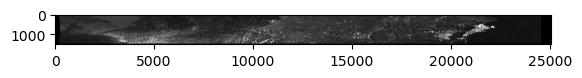

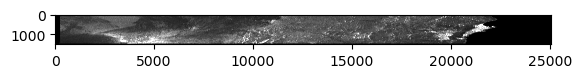

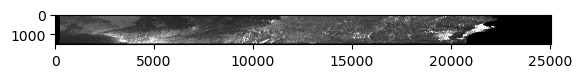

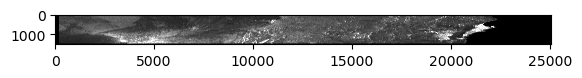

In [5]:
plt.imshow(np.abs(image_1),cmap="gray",vmax= 1/60* np.max(np.abs(image_1)))
plt.show()

plt.imshow(np.abs(image_2),cmap="gray",vmax= 1/60* np.max(np.abs(image_2)))
plt.show()

plt.imshow(np.abs(image_3),cmap="gray",vmax= 1/60* np.max(np.abs(image_3)))
plt.show()

plt.imshow(np.abs(image_4),cmap="gray",vmax= 1/60* np.max(np.abs(image_4)))
plt.show()


# Specification de la zone de pixels  

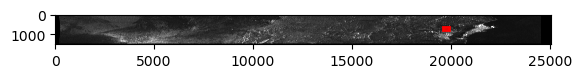

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook
import numpy as np  # Assurez-vous d'importer la bibliothèque numpy

# Supposons que image_1 est déjà définie

# Définir les limites de la zone à visualiser
sy_start, sy_end = 650, 800
sx_start, sx_end = 19600, 19900

# Extraire la zone spécifiée de l'image
cropped_img = np.abs(image_1[sy_start:sy_end, sx_start:sx_end])  # Assurez-vous d'utiliser np.abs pour une image complexe

# Afficher l'image avec une figure
fig, ax = plt.subplots()

# Afficher l'image
ax.imshow(np.abs(image_1), cmap="gray", vmax=1/60*np.max(np.abs(image_1)))

# Ajouter un marqueur sur la zone spécifiée
rect = patches.Rectangle((sx_start, sy_start), sx_end - sx_start, sy_end - sy_start,
                         linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Afficher la figure
plt.show()


In [14]:
sy = np.s_[650:800] 
sx = np.s_[19600:19900]

#sy = np.s_[600:1200] 
#sx = np.s_[14400:16900]

img1 = image_1[sy, sx]

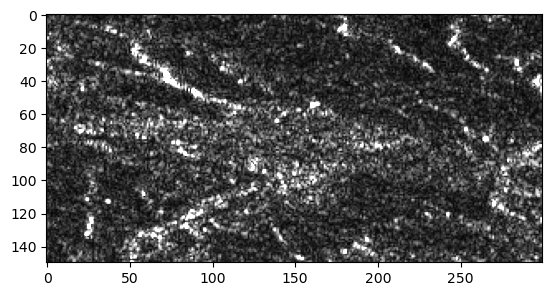

In [15]:
plt.imshow(np.abs(img1),cmap="gray",vmax= 1/5* np.max(np.abs(img1)))
plt.show()

In [16]:
img2 = image_2[sy, sx]

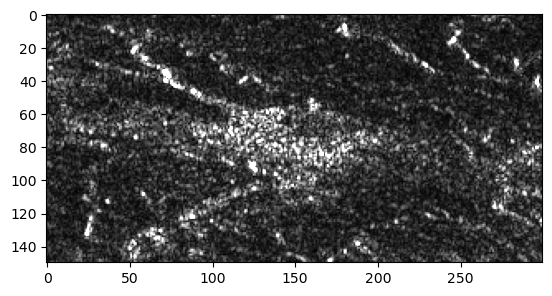

In [17]:
plt.imshow(np.abs(img2),cmap="gray",vmax= 1/5* np.max(np.abs(img2)))
plt.show()

In [18]:
img3 = image_3[sy, sx]


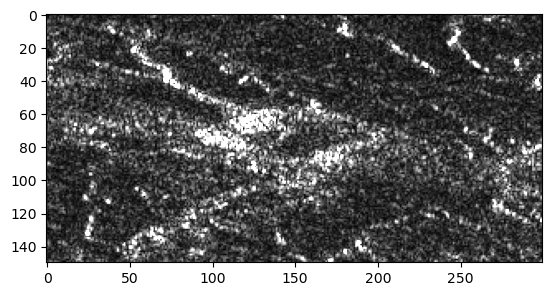

In [19]:
plt.imshow(np.abs(img3),cmap="gray",vmax= 1/5* np.max(np.abs(img3)))
plt.show()


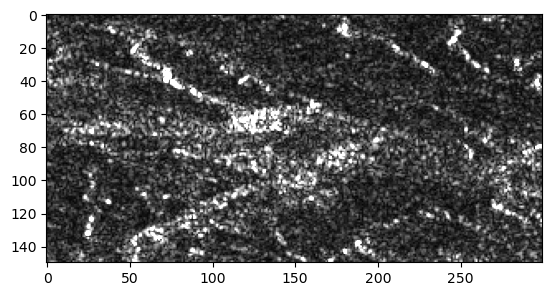

In [51]:
img4 = image_4[sy, sx]
plt.imshow(np.abs(img4),cmap="gray",vmax= 1/5* np.max(np.abs(img4)))
plt.show()

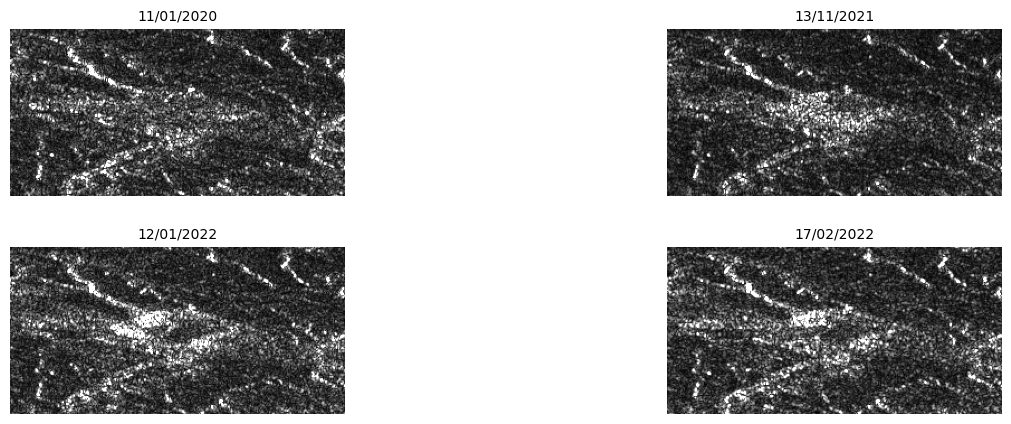

In [27]:
from datetime import datetime

images = [img1, img2, img3, img4]

dates = ["11/01/2020","13/11/2021", "12/01/2022", "17/02/2022"]

date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, (img, date) in enumerate(zip(images, date_objects)):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].imshow(np.abs(img), cmap="gray", vmax=1/5 * np.max(np.abs(img)))
    axes[row_index, col_index].axis('off')  # Désactivez les axes pour une meilleure présentation
    axes[row_index, col_index].set_title(date.strftime("%d/%m/%Y"), fontsize=10)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


# Forming the ratio image

In [29]:
reference_image = img1
def ratio(img, reference_img):
    # Ajoutez une petite valeur à reference_img pour éviter la division par zéro
    for i in range (np.shape(reference_img)[0]):
        for j in range (np.shape(reference_img)[1]):
             if reference_img[i, j] == 0.+0.j:
                    reference_img[i, j] = 1e-3+0.j               
    return np.clip(img / reference_image, 1e-3, 10)

ratio_img1 = ratio (img2, reference_image)
ratio_img2 = ratio (img3, reference_image) 
ratio_img3 = ratio (img4, reference_image)

ratio_real1 = np.real(ratio_img1)
ratio_real2 = np.real(ratio_img2)
ratio_real3 = np.real(ratio_img3)

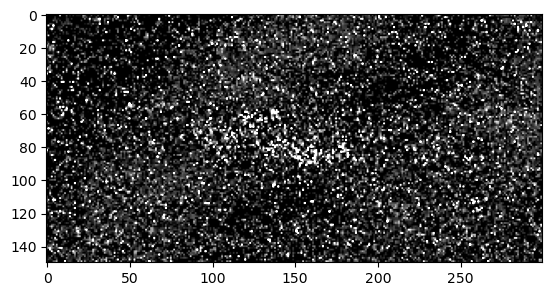

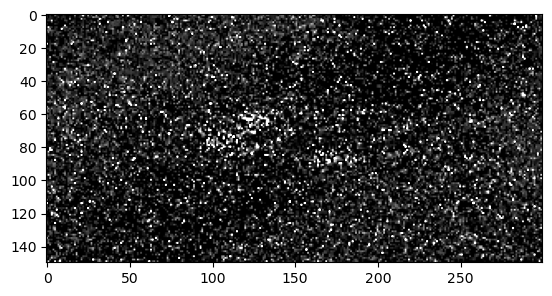

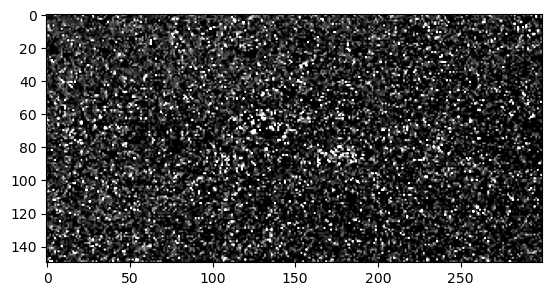

In [30]:
#affichage de l'image ratio: 
plt.imshow(np.abs(ratio_img1),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img1)))
plt.show()
plt.imshow(np.abs(ratio_img2),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img2)))
plt.show()
plt.imshow(np.abs(ratio_img3),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img3)))
plt.show()

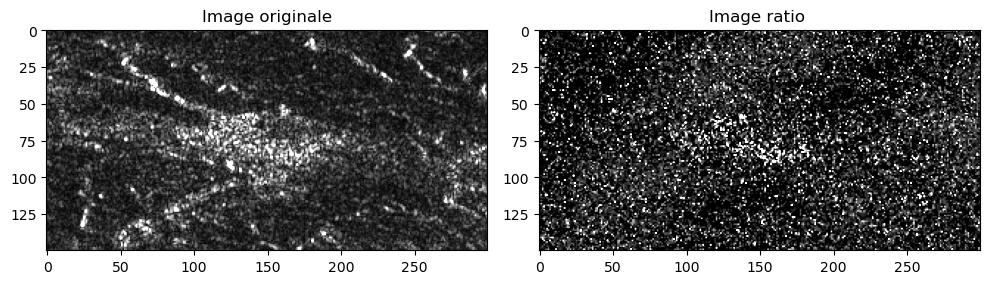

In [32]:
# Affichage de l'image originale (img2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(img2),cmap="gray",vmax= 1/5* np.max(np.abs(img2)))
plt.title('Image originale')

# Affichage de l'image ratio (ratio_img2)
plt.subplot(1, 2, 2)
plt.imshow(np.abs(ratio_img1), cmap="gray", vmax=1/10 * np.max(np.abs(ratio_img1)))
plt.title('Image ratio ')

# Afficher les deux images côte à côte
plt.tight_layout()
plt.show()


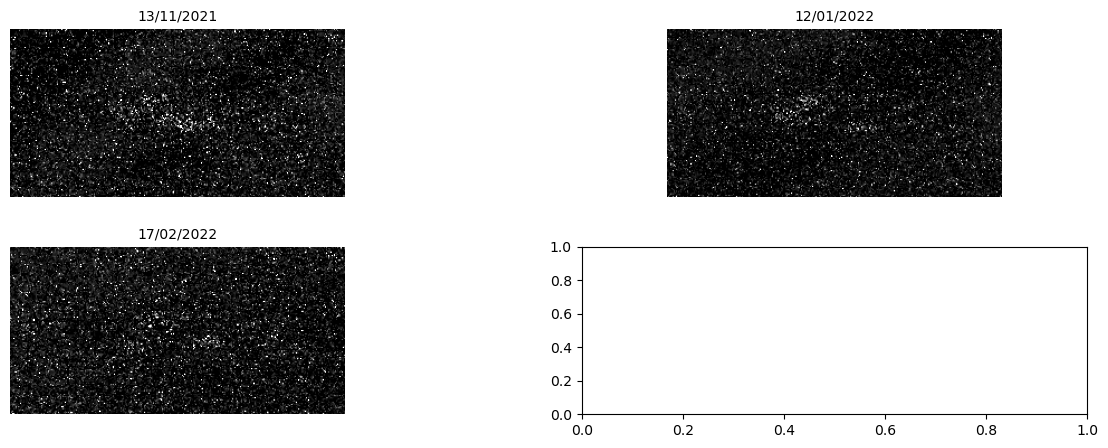

In [37]:
from datetime import datetime

images = [ratio_img1, ratio_img2, ratio_img3]

dates = ["13/11/2021", "12/01/2022", "17/02/2022"]

date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, (img, date) in enumerate(zip(images, date_objects)):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].imshow(np.abs(img), cmap="gray", vmax=1/5 * np.max(np.abs(img)))
    axes[row_index, col_index].axis('off')  # Désactivez les axes pour une meilleure présentation
    axes[row_index, col_index].set_title(date.strftime("%d/%m/%Y"), fontsize=10)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


In [38]:
#interpolation
ratio_nn1= list(map(interpolate_nn,tqdm(ratio_real1)))

100%|█████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 13603.15it/s]


In [39]:
#interpolation
ratio_nn2= list(map(interpolate_nn,tqdm(ratio_real2)))

100%|█████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 12115.50it/s]


# Denoising

In [40]:
from skimage import io, img_as_ubyte
from skimage.restoration import denoise_tv_bregman
import cv2

In [42]:
# débruitage avec le filtre TV-Bregman (débruitage anisotrope)
image_denoised1 = denoise_tv_bregman(ratio_real1, weight=0.1)
image_denoised2 = denoise_tv_bregman(ratio_real2, weight=0.1)
image_denoised3 = denoise_tv_bregman(ratio_real3, weight=0.1)

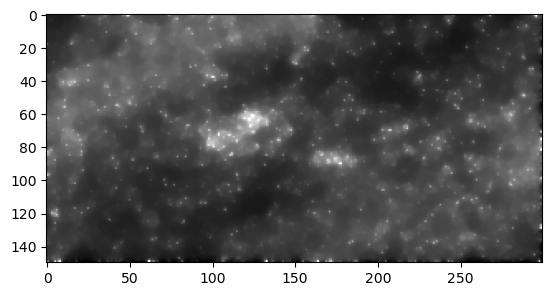

In [44]:
#affichage de l'image débruitée : 
plt.imshow(image_denoised2,cmap="gray",vmax= 1/2*np.max(image_denoised2))
plt.show()

# Seuillage

In [58]:
def seuillage(image_gris, seuil):
    _, image_bw = cv2.threshold(image_gris, seuil, 255, cv2.THRESH_BINARY)
    return image_bw

# Appliquer le seuillage
image_bw1 = seuillage(image_denoised1, seuil=1)
image_bw2 = seuillage(image_denoised2, seuil=1)
image_bw3 = seuillage(image_denoised3, seuil=0.75)

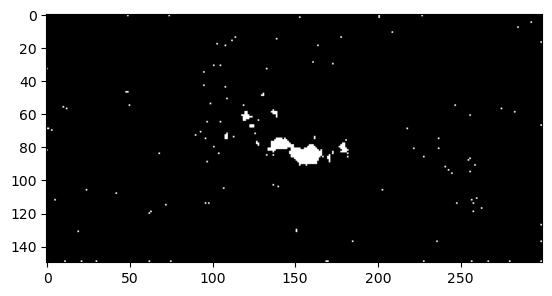

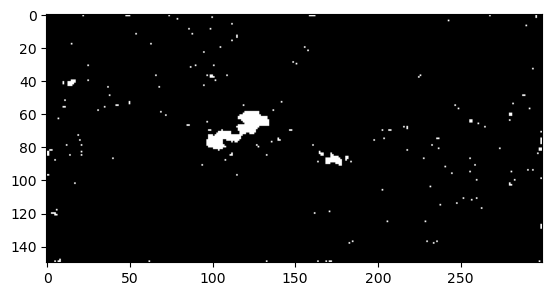

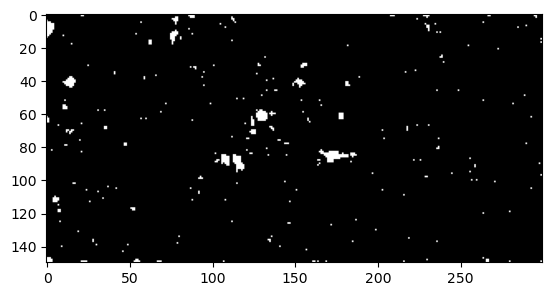

In [59]:
#affichage des images en noir et blanc: 
plt.imshow(image_bw1,cmap="gray",vmax= 1* np.max(image_bw1))
plt.show()
plt.imshow(image_bw2,cmap="gray",vmax= 1* np.max(image_bw2))
plt.show()
plt.imshow(image_bw3,cmap="gray",vmax= 1* np.max(image_bw3))
plt.show()

# Zoom sur la zone d'intérêt 

In [70]:
sx2 = np.s_[80:200] 
sy2 = np.s_[40:110]
imgbw1 = image_bw1[sy2, sx2]
imgbw2 = image_bw2[sy2, sx2]
imgbw3 = image_bw3[sy2, sx2]

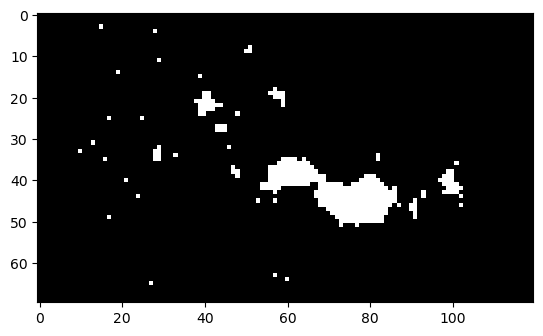

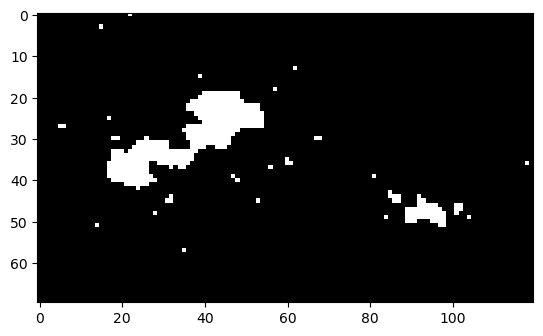

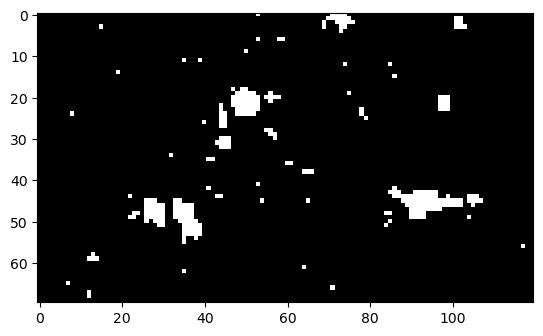

In [71]:
#affichage des images en noir et blanc: 
plt.imshow(imgbw1,cmap="gray",vmax= 1* np.max(imgbw1))
plt.show()
plt.imshow(imgbw2,cmap="gray",vmax= 1* np.max(imgbw2))
plt.show()
plt.imshow(imgbw3,cmap="gray",vmax= 1* np.max(imgbw3))
plt.show()

# Enlever les pixels blancs hors de la zone d'intérêt:

In [72]:
from skimage import io, morphology
from skimage.color import rgb2gray

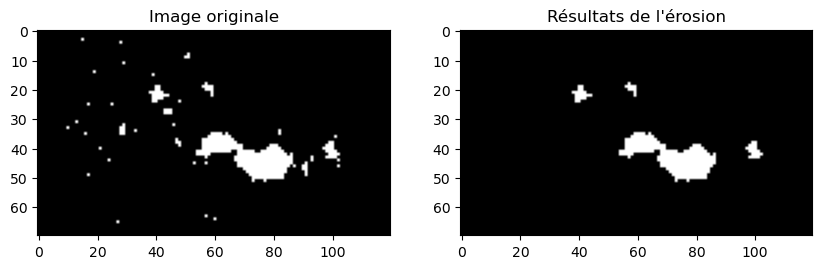

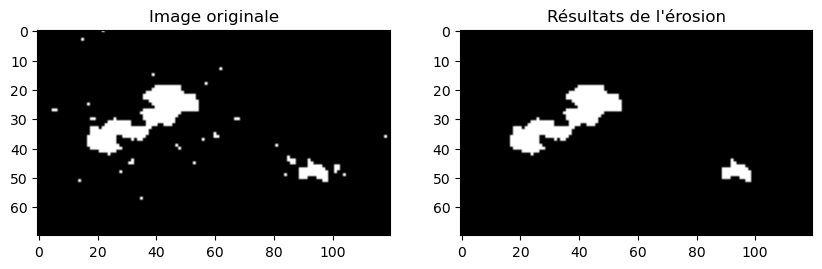

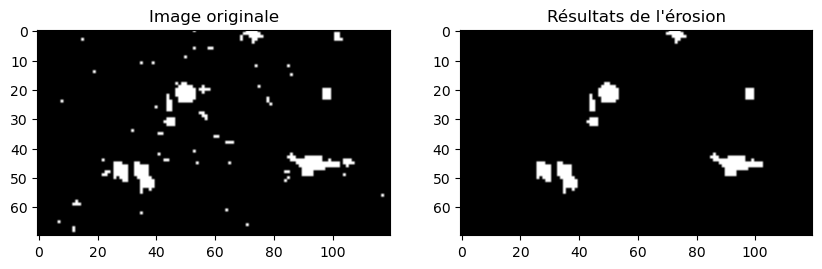

In [88]:
from skimage import morphology, color
import matplotlib.pyplot as plt

def remove_small_spots_skimage(image, min_size):
    # Convertir l'image en niveaux de gris si elle est en couleur
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Binariser l'image
    binary_image = image > 0.5  # Ajustez le seuil selon votre image

    # Utiliser la fonction remove_small_objects
    binary_image_no_small = morphology.remove_small_objects(binary_image, min_size=min_size, connectivity=1)

    # Visualiser les résultats
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Image originale')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_image_no_small, cmap='gray')
    plt.title("Résultats de l'érosion")

    plt.show()

    return binary_image_no_small

min_size = 10  # Remplacez cela par votre propre taille minimale

# Appliquer la fonction sur vos images
binary_image_no_small_1 = remove_small_spots_skimage(imgbw1, min_size)
binary_image_no_small_2 = remove_small_spots_skimage(imgbw2, min_size)
binary_image_no_small_3 = remove_small_spots_skimage(imgbw3, min_size)

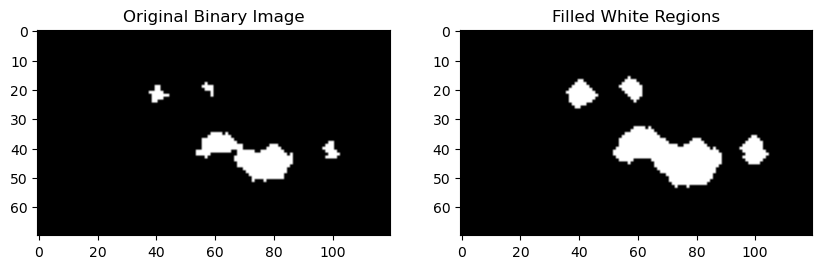

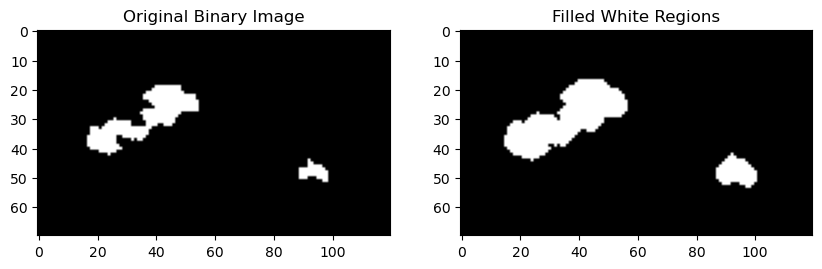

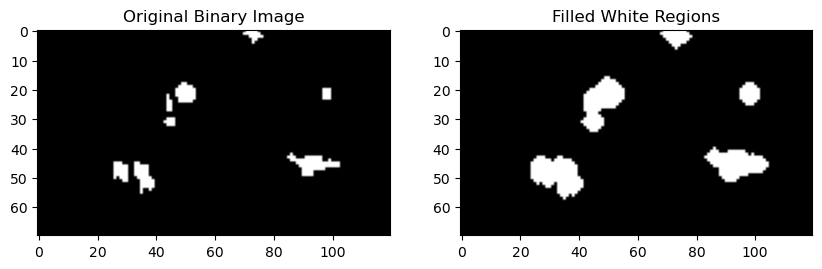

In [89]:
from skimage import morphology, color
import matplotlib.pyplot as plt

def fill_white_regions(image):
    # Convert the image to grayscale if it's in color
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Binarize the image
    binary_image = image > 0.5  # Adjust the threshold according to your image

    # Use binary dilation to fill white regions
    footprint = morphology.disk(2)  # Adjust the disk size as needed
    filled_image = morphology.binary_dilation(binary_image, footprint=footprint)

    # Visualize the results
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Original Binary Image')

    plt.subplot(1, 2, 2)
    plt.imshow(filled_image, cmap='gray')
    plt.title('Filled White Regions')

    plt.show()

    return filled_image

# Apply the function to your images
filled_image_1 = fill_white_regions(binary_image_no_small_1)
filled_image_2 = fill_white_regions(binary_image_no_small_2)
filled_image_3 = fill_white_regions(binary_image_no_small_3)

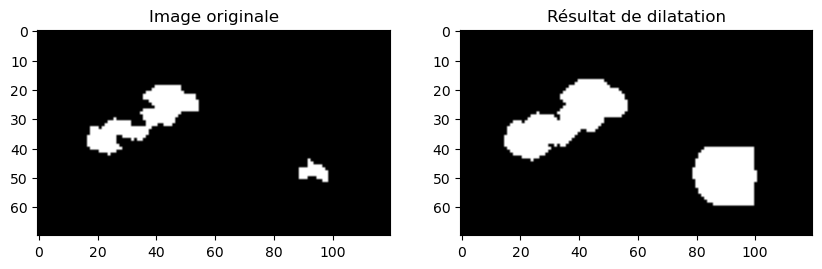

In [90]:
def fill_specific_zone(image, xmin, xmax, ymin, ymax, footprint_size):
    # Convert the image to grayscale if it's in color
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Copy the original image to avoid modifying the input
    filled_image = np.copy(image)

    # Extract the specified zone from the image
    zone = filled_image[ymin:ymax, xmin:xmax]

    # Create a binary mask for the specified zone
    binary_zone = zone > 0.5  # Adjust the threshold according to your image

    # Use binary dilation to fill the specified zone with a specified footprint
    footprint = morphology.disk(footprint_size)
    filled_zone = morphology.binary_dilation(binary_zone, footprint=footprint)

    # Update the filled image with the filled zone
    filled_image[ymin:ymax, xmin:xmax] = filled_zone.astype(filled_image.dtype)

    return filled_image


# Specify the bounding box of the zone you want to fill
xmin, xmax, ymin, ymax = 80, 125, 80, 150

# Specify the footprint size for filling the zone
footprint_size = 3  # Adjust as needed

# Apply the function to your images and specified zone
filled_image_zone_1 = fill_specific_zone(filled_image_2, xmin, xmax, ymin, ymax, footprint_size)



# Specify the bounding box of the zone you want to fill
xmin1, xmax1, ymin1, ymax1 = 70, 100, 40, 60

# Specify the footprint size for filling the zone
footprint_size1 = 8  # Adjust as needed

# Apply the function to your images and specified zone
filled_image_2 = fill_specific_zone(filled_image_zone_1, xmin1, xmax1, ymin1, ymax1, footprint_size1)
# Visualize the results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(binary_image_no_small_2, cmap='gray')
plt.title('Image originale')

plt.subplot(1, 2, 2)
plt.imshow(filled_image_2, cmap='gray')
plt.title('Résultat de dilatation')

plt.show()


# Surface de la zone blanche

In [91]:
# Compter le nombre de pixels blancs dans l'image
white_pixel_count1 = np.sum(filled_image_1 == 1)
white_pixel_count2 = np.sum(filled_image_2 == 1)
white_pixel_count3 = np.sum(filled_image_3 == 1)

print("Nombre de pixels de la zone blanche dans la premiere image: {} pixels carrés".format(white_pixel_count1))
print("Nombre de pixels de la zone blanche dans la deuxième image: {} pixels carrés".format(white_pixel_count2))
print("Nombre de pixels de la zone blanche dans la premiere image: {} pixels carrés".format(white_pixel_count3))

Nombre de pixels de la zone blanche dans la premiere image: 587 pixels carrés
Nombre de pixels de la zone blanche dans la deuxième image: 943 pixels carrés
Nombre de pixels de la zone blanche dans la premiere image: 577 pixels carrés


Dans notre cas de données sentinel-1 IW, la cellule de resolution a la taille de 5*20 m = 100 m²

In [92]:
# Afficher la surface de la zone blanche en pixels carrés
surface1 = white_pixel_count1*100
surface2 = white_pixel_count2*100
surface3 = white_pixel_count3*100

print("Surface de la zone blanche dans la premiere image: {} mètre carrés".format(surface1))
print("Surface de la zone blanche dans la premiere image: {} mètre carrés".format(surface2))
print("Surface de la zone blanche dans la premiere image: {} mètre carrés".format(surface3))

Surface de la zone blanche dans la premiere image: 58700 mètre carrés
Surface de la zone blanche dans la premiere image: 94300 mètre carrés
Surface de la zone blanche dans la premiere image: 57700 mètre carrés


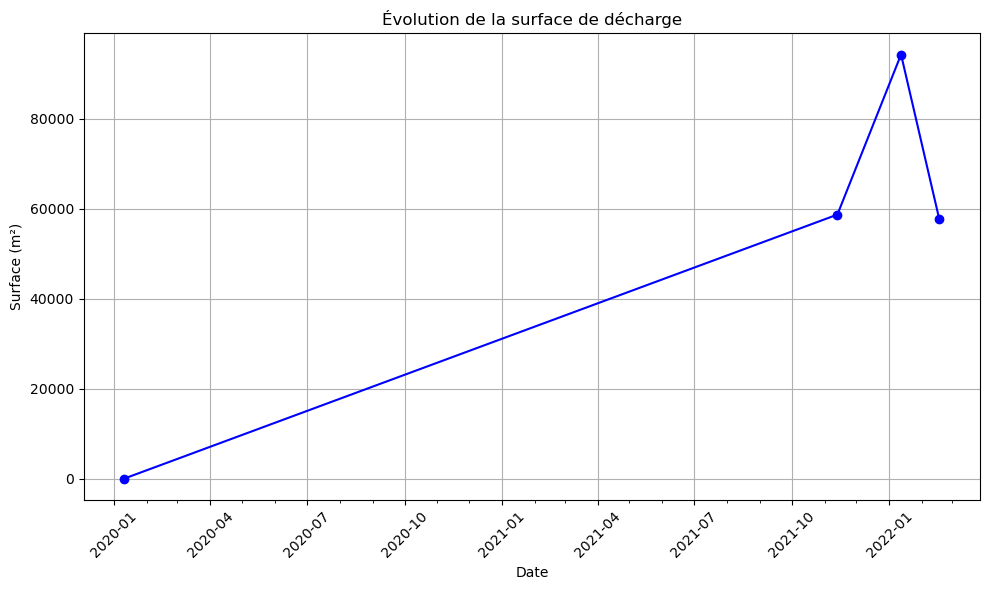

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, MonthLocator

# Supposons que vous avez des données de dates et de surfaces
dates = ["11/01/2020","13/11/2021", "12/01/2022", "17/02/2022"]

# Conversion des dates en objets datetime
date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

# Supposons que vous ayez des valeurs de surface (remplacez surface1, surface2, etc. par vos valeurs réelles)
surfaces = [0, surface1, surface2, surface3]

# Tracer l'évolution de la surface en fonction des dates
plt.figure(figsize=(10, 6))
plt.plot(date_objects, surfaces, marker='o', linestyle='-', color='b')
plt.title('Évolution de la surface de décharge')
plt.xlabel('Date')
plt.ylabel('Surface (m²)')

# Utiliser AutoDateLocator pour ajuster automatiquement l'échelle des dates
locator = AutoDateLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(AutoDateFormatter(locator))

# Ajouter les mois à l'axe des x
plt.gca().xaxis.set_minor_locator(MonthLocator())
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()
